In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Define Sigmoid

0.000123394575986
0.5
0.999876605424


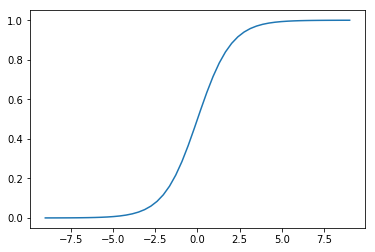

In [2]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9.0, stop=+9.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

0.000123379349765
0.25
0.000123379349765


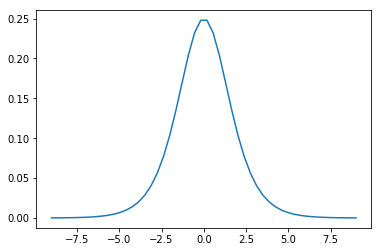

In [6]:
def sigmoid_derivation(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9.0, stop=+9.0)
yy = sigmoid_derivation(xx)

plt.plot(xx, yy)

print(sigmoid_derivation(-9))
print(sigmoid_derivation(0))
print(sigmoid_derivation(+9))

In [8]:
class Multiply:
    def forward(self, x, y):
        self.x = x
        self.y = y
        
        return self.x * self.y
    
    def backward(self):
        return [self.y, self.x]
        
    
multiply = Multiply()
print(multiply.forward(2, 3))
print(multiply.backward())

6
[3, 2]


In [12]:
class Exp:
    def forward(self, x):
        self.x = x
        return np.exp(self.x)
    
    def backward(self):
        return np.exp(self.x)
    
exp = Exp()
print(exp.forward(0))
print(exp.backward())

1.0
1.0


In [13]:
class Add:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return self.x + self.y
    def backward(self):
        return [1, 1]
    
add = Add()
print(add.forward(2, 3))
print(add.backward())

5
[1, 1]


In [14]:
class Flip:
    def forward(self, x):
        self.x = x
        return 1 / x
    def backward(self):
        return -1.0 * (1 / self.x ** 2)
    
flip = Flip()
print(flip.forward(2))
print(flip.backward())

0.5
-0.25


In [27]:
multiply = Multiply()
exp = Exp()
add = Add()
flip = Flip()

x = -9

forward1 = multiply.forward(-1.0, x)
forward2 = exp.forward(forward1)
forward3 = add.forward(1.0, forward2)
forward4 = flip.forward(forward3)

print("sigmoid({0}) = {1}".format(x, forward4))
forward4

sigmoid(-9) = 0.00012339457598623172


0.00012339457598623172

In [28]:
backward1 = flip.backward()
backward2 = backward1 * add.backward()[0]
backward3 = backward2 * exp.backward()
backward4 = backward3 * multiply.backward()[1]


print("sigmoid_derivation({0}) = {1}".format(x, backward4))
round(backward4, 6) == round(sigmoid_derivation(x), 6)

sigmoid_derivation(-9) = 0.0001233793497648489


True